In [995]:
import os
import sys
import subprocess
import pandas as pd

In [996]:
audioset_labels = pd.read_csv("data/class_labels_indices.csv")
qa_true_count = pd.read_csv("data/qa_true_counts.csv")
original_labels = audioset_labels.copy()
# audioset_unbal_train_df = pd.read_csv("data/audioset/unbalanced_train_segments.csv")
audioset_bal_train = pd.read_csv("data/balanced_train_segments-edited.csv")#, delimiter=', ', engine='python')
audioset_eval = pd.read_csv("data/eval_segments-edited.csv")#, delimiter=', ', engine='python')

In [997]:
audioset_bal_train.shape

(22160, 15)

In [998]:
print(list(audioset_bal_train.columns.values))
print(list(audioset_eval.columns.values))

['# YTID', ' start_seconds', ' end_seconds', ' positive_labels', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14']
['# YTID', ' start_seconds', ' end_seconds', ' positive_labels', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']


In [999]:
train_cols = list(audioset_bal_train.columns.values)[3:]
print(train_cols)

[' positive_labels', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14']


In [1000]:
eval_cols = list(audioset_eval.columns.values)[3:]
print(eval_cols)

[' positive_labels', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']


In [1001]:
# Create column with all labels
audioset_bal_train.fillna('', inplace=True)
audioset_eval.fillna('', inplace=True)
audioset_bal_train['all_labels'] = audioset_bal_train[train_cols].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
audioset_eval['all_labels'] = audioset_bal_train[eval_cols].apply(lambda row: ','.join(row.values.astype(str)), axis=1)
audioset_bal_train['all_labels'] = audioset_bal_train['all_labels'].str.rstrip(',')
audioset_eval['all_labels'] = audioset_eval['all_labels'].str.rstrip(',')

In [1055]:
# Define some helper functions
def contains_animal_label(positive_labels):
    for label in label_list:
        if label in positive_labels:
            return True
    return False

def contains_only_animal_label(positive_labels):
    for label in label_list:
        if label not in positive_labels:
            return False
    return True

def get_display_name_from_mid(mid):
    return original_labels.loc[original_labels['mid'] == mid].iloc[0]['display_name']

def get_true_count_from_mid(mid):
    return qa_true_count.loc[qa_true_count['label_id'] == mid].iloc[0]['num_true']


def strip_quotes(in_string):
    in_string = in_string.strip()
    if in_string.startswith('"'):
        in_string = in_string[1:]
    if in_string.endswith('"'):
        in_string = in_string[:-1]
    return in_string

In [1003]:
# Strip quotes from every column. They are no longer needed
for col in train_cols:
    audioset_bal_train[col] = audioset_bal_train[col].apply(strip_quotes)
for col in eval_cols:
    audioset_eval[col] = audioset_eval[col].apply(strip_quotes)

In [1004]:
train_cols = list(audioset_bal_train.columns.values)
print(train_cols)

eval_cols = list(audioset_eval.columns.values)
print(train_cols)

['# YTID', ' start_seconds', ' end_seconds', ' positive_labels', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'all_labels']
['# YTID', ' start_seconds', ' end_seconds', ' positive_labels', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'all_labels']


In [1005]:
# Rearragne columns
audioset_bal_train = audioset_bal_train[['# YTID', ' start_seconds', ' end_seconds', 'all_labels', ' positive_labels', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14']]
audioset_eval = audioset_eval[['# YTID', ' start_seconds', ' end_seconds', 'all_labels', ' positive_labels', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']]

In [1006]:
# Rearragne columns
audioset_bal_train.rename(columns={" positive_labels": 'Unnamed: 3'}, inplace=True)
audioset_eval.rename(columns={" positive_labels": 'Unnamed: 3'}, inplace=True)

In [1007]:
audioset_bal_train.head()

,# YTID,start_seconds,end_seconds,all_labels,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,#NAME?,30.0,40.0,"""/m/09x0r,/t/dd00088""",/m/09x0r,/t/dd00088,,,,,,,,,,
1,#NAME?,50.0,60.0,"""/m/012xff""",/m/012xff,,,,,,,,,,,
2,#NAME?,0.0,10.0,"""/m/03fwl,/m/04rlf,/m/09x0r""",/m/03fwl,/m/04rlf,/m/09x0r,,,,,,,,,
3,#NAME?,30.0,40.0,"""/t/dd00003,/t/dd00005""",/t/dd00003,/t/dd00005,,,,,,,,,,
4,#NAME?,200.0,210.0,"""/m/032s66,/m/073cg4""",/m/032s66,/m/073cg4,,,,,,,,,,


In [1008]:
audioset_labels.head()

,index,mid,display_name
0,0,/m/09x0r,Speech
1,1,/m/05zppz,"Male speech, man speaking"
2,2,/m/02zsn,"Female speech, woman speaking"
3,3,/m/0ytgt,"Child speech, kid speaking"
4,4,/m/01h8n0,Conversation


In [1009]:
 index_list = [
 72,
 73,
 74,
 75,
 77,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
100,
101,
102,
103,
104,
105,
106,
108,
109,
110,
111,
112,
113,
114,
115,
116,
117,
118,
119,
120,
121,
122,
123,
124,
125,
126,
127,
128,
129,
130,
131,
132,
133,
134,
135,
136 ]

In [1010]:
len(index_list)

61

In [1011]:
# Only use animal labels
audioset_labels = audioset_labels.iloc[index_list]
print(audioset_labels.shape)

(61, 3)


In [1012]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(audioset_labels)

In [1013]:
# Add column indicating if data has a single label or multiple labels
#  audioset_bal_train['singlelabel'] = audioset_bal_train[' positive_labels'].str.endswith('"')
#  audioset_eval['singlelabel'] = audioset_bal_train[' positive_labels'].str.endswith('"')

In [1014]:
print("Train shape:", audioset_bal_train.shape)
print("Eval shape:", audioset_eval.shape)

Train shape: (22160, 16)
Eval shape: (20373, 15)


In [1015]:
label_list = audioset_labels['mid'].tolist()
print(label_list)

['/m/0jbk', '/m/068hy', '/m/0bt9lr', '/m/05tny_', '/m/07qf0zm', '/m/0ghcn6', '/t/dd00136', '/m/01yrx', '/m/02yds9', '/m/07qrkrw', '/m/07rjwbb', '/m/07r81j2', '/m/0ch8v', '/m/03k3r', '/m/07rv9rh', '/m/07q5rw0', '/m/01xq0k1', '/m/07rpkh9', '/m/068zj', '/t/dd00018', '/m/03fwl', '/m/07q0h5t', '/m/07bgp', '/m/025rv6n', '/m/09b5t', '/m/07st89h', '/m/07qn5dc', '/m/01rd7k', '/m/07svc2k', '/m/09ddx', '/m/07qdb04', '/m/0dbvp', '/m/01280g', '/m/0cdnk', '/m/04cvmfc', '/m/015p6', '/m/020bb7', '/m/07pggtn', '/m/07sx8x_', '/m/0h0rv', '/m/07r_25d', '/m/04s8yn', '/m/07r5c2p', '/m/09d5_', '/m/07r_80w', '/m/05_wcq', '/m/01z5f', '/m/06hps', '/m/04rmv', '/m/07r4gkf', '/m/03vt0', '/m/09xqv', '/m/09f96', '/m/0h2mp', '/m/07pjwq1', '/m/01h3n', '/m/09ld4', '/m/07st88b', '/m/078jl', '/m/07qn4z3', '/m/032n05']


In [1016]:
audioset_bal_train.head()

,# YTID,start_seconds,end_seconds,all_labels,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,#NAME?,30.0,40.0,"""/m/09x0r,/t/dd00088""",/m/09x0r,/t/dd00088,,,,,,,,,,
1,#NAME?,50.0,60.0,"""/m/012xff""",/m/012xff,,,,,,,,,,,
2,#NAME?,0.0,10.0,"""/m/03fwl,/m/04rlf,/m/09x0r""",/m/03fwl,/m/04rlf,/m/09x0r,,,,,,,,,
3,#NAME?,30.0,40.0,"""/t/dd00003,/t/dd00005""",/t/dd00003,/t/dd00005,,,,,,,,,,
4,#NAME?,200.0,210.0,"""/m/032s66,/m/073cg4""",/m/032s66,/m/073cg4,,,,,,,,,,


In [1017]:
audioset_bal_train['animal_sound'] = audioset_bal_train['all_labels'].apply(contains_animal_label)
audioset_eval['animal_sound'] = audioset_eval['all_labels'].apply(contains_animal_label)

In [1018]:
audioset_bal_train['only_animal'] = audioset_bal_train['all_labels'].apply(contains_only_animal_label)
audioset_eval['only_animal'] = audioset_eval['all_labels'].apply(contains_only_animal_label)

In [1019]:
# Fitler all non-animal data
#audioset_bal_train = audioset_bal_train[audioset_bal_train[' positive_labels'].isin(label_list)]
audioset_bal_train = audioset_bal_train[audioset_bal_train['animal_sound'] == True]
print("Balanced train data:")
print(audioset_bal_train.shape)
#print(audioset_bal_train.head())

#  print("Unbalanced train data:")
#  audioset_unbal_train[audioset_unbal_train[' positive_labels'].isin(label_list)]
#  audioset_unbal_train.shape

audioset_eval = audioset_eval[audioset_eval['animal_sound'] == True]
print("Eval data")
print(audioset_eval.shape)
#print(audioset_eval.head())

Balanced train data:
(2391, 18)
Eval data
(2206, 17)


In [1020]:
# Is there any data will only animal sounds?....No? Maybe I scrubbed off too many labels when editing
only_animal = audioset_bal_train[audioset_bal_train['only_animal'] == True]
print("Balanced train data:")
print(only_animal.shape)

Balanced train data:
(0, 18)


In [1021]:
# Filter all wavs with multiple labels
#audioset_bal_train = audioset_bal_train.loc[temp_df['singlelabel'] == True]
#print("Balanced train data:")
#print(audioset_bal_train.shape)

#  print("Unbalanced train data:")
#  audioset_unbal_train[audioset_unbal_train[' positive_labels'].isin(label_list)]
#  audioset_unbal_train.shape

#audioset_eval = audioset_eval.loc[audioset_eval['singlelabel'] == False]
#print("Eval data")
#print(audioset_eval.shape)

In [1022]:
# Save filtered data frames
audioset_bal_train.to_csv('data/balanced_train_segments-animals.csv', header=True, index=False)
audioset_eval.to_csv('data/eval_segments-animals.csv', header=True, index=False)
audioset_labels.to_csv('data/class_labels_indices-animals.csv', header=True, index=False)

In [1023]:
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

## Everything after this needs to be updated

In [1024]:
# Create temp_df so that we can scrub the positive_label column and perform some operations to view the data
temp_df = audioset_bal_train.copy()
temp_df.head()

,# YTID,start_seconds,end_seconds,all_labels,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,animal_sound,only_animal
2,#NAME?,0.0,10.0,"""/m/03fwl,/m/04rlf,/m/09x0r""",/m/03fwl,/m/04rlf,/m/09x0r,,,,,,,,,,True,False
15,-11LhdJgBb8,30.0,40.0,"""/m/04rlf,/m/07qn4z3""",/m/04rlf,/m/07qn4z3,,,,,,,,,,,True,False
29,-3IYpJfLVJk,30.0,40.0,"""/m/03k3r,/m/07q5rw0,/m/0jbk""",/m/03k3r,/m/07q5rw0,/m/0jbk,,,,,,,,,,True,False
45,-64xnyOswXA,120.0,130.0,"""/m/0cdnk""",/m/0cdnk,,,,,,,,,,,,True,False
54,-6x2PtSRfJU,30.0,40.0,"""/m/01yrx,/m/068hy,/m/07qrkrw,/m/09x0r""",/m/01yrx,/m/068hy,/m/07qrkrw,/m/09x0r,,,,,,,,,True,False


In [1025]:
df = temp_df['Unnamed: 3'].value_counts().to_frame()
df.head()

,Unnamed: 3
/m/04rlf,193
/m/015p6,171
/m/068hy,157
/m/025rv6n,133
/m/01yrx,120


In [1026]:
df.columns

Index(['Unnamed: 3'], dtype='object')

In [1027]:
#df.reset_index(inplace=True)
df['mid'] = df.index
df.head()

,Unnamed: 3,mid
/m/04rlf,193,/m/04rlf
/m/015p6,171,/m/015p6
/m/068hy,157,/m/068hy
/m/025rv6n,133,/m/025rv6n
/m/01yrx,120,/m/01yrx


In [1028]:
#df.columns = ['mid', 'count']
df.rename(columns={'Unnamed: 3': 'count'}, inplace=True)
df['display_name'] = df['mid'].apply(get_display_name_from_mid)

In [1029]:
df.head()

,count,mid,display_name
/m/04rlf,193,/m/04rlf,Music
/m/015p6,171,/m/015p6,Bird
/m/068hy,157,/m/068hy,"Domestic animals, pets"
/m/025rv6n,133,/m/025rv6n,Fowl
/m/01yrx,120,/m/01yrx,Cat


In [1030]:
df.columns

Index(['count', 'mid', 'display_name'], dtype='object')

In [1031]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

            count         mid                             display_name
/m/04rlf      193    /m/04rlf                                    Music
/m/015p6      171    /m/015p6                                     Bird
/m/068hy      157    /m/068hy                   Domestic animals, pets
/m/025rv6n    133  /m/025rv6n                                     Fowl
/m/01yrx      120    /m/01yrx                                      Cat
/m/03vt0      104    /m/03vt0                                   Insect
/m/03k3r       77    /m/03k3r                                    Horse
/m/01xq0k1     62  /m/01xq0k1                          Cattle, bovinae
/m/01280g      61   /m/01280g                             Wild animals
/m/07r_80w     60  /m/07r_80w                                     Hoot
/m/01h3n       60    /m/01h3n                          Bee, wasp, etc.
/m/032n05      59   /m/032n05                       Whale vocalization
/m/07st88b     59  /m/07st88b                                    Croak
/m/078

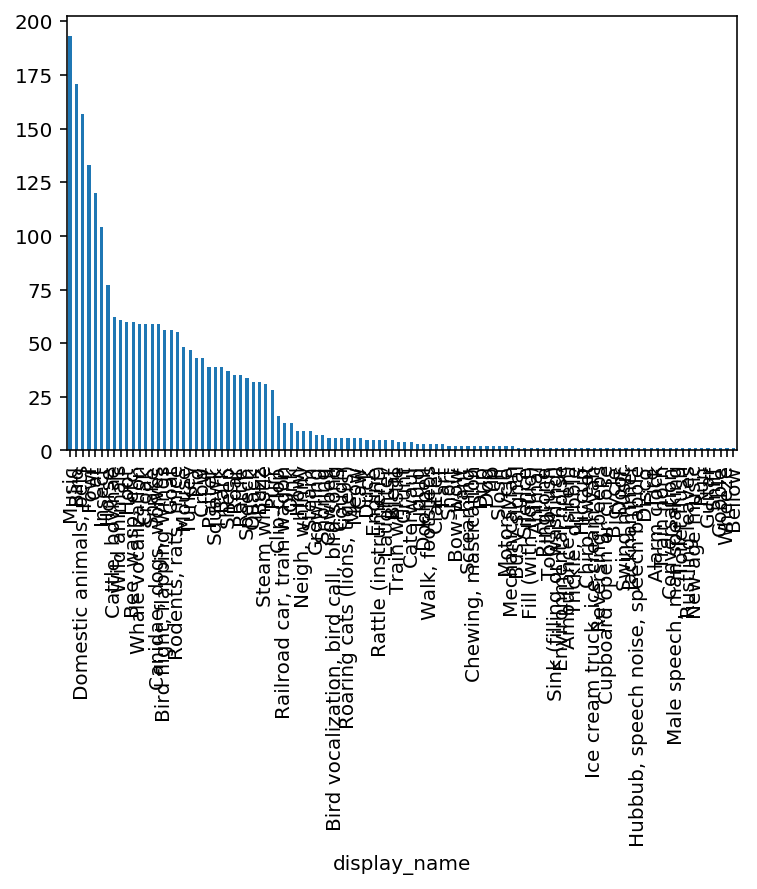

In [1032]:
hist_df = df.loc[:, ['count', 'display_name','mid']]
hist_df.set_index('display_name', inplace=True)
hist_df['count'].plot(kind="bar")

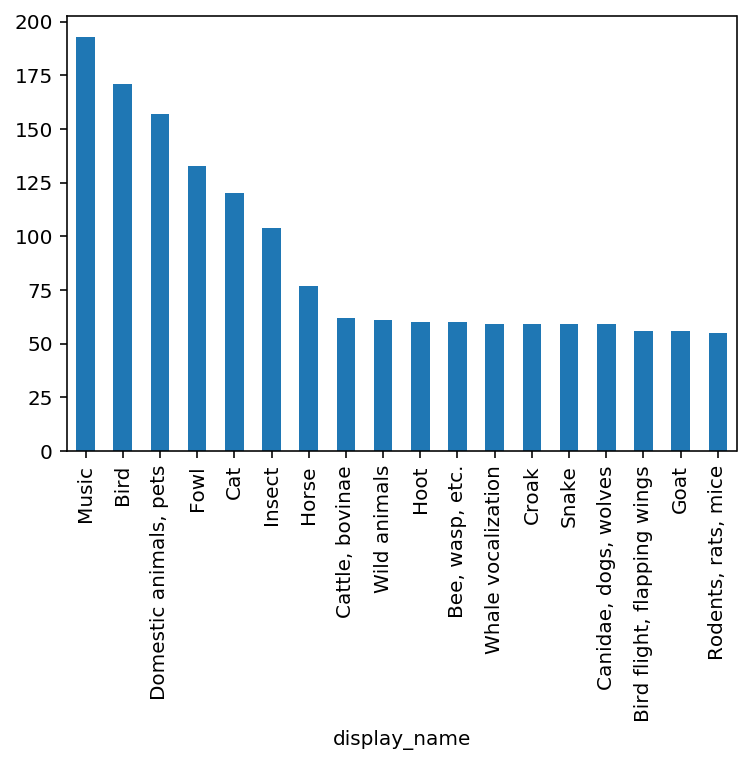

In [1033]:
hist_df = hist_df[hist_df['count'] > 49 ]
hist_df['count'].plot(kind='bar')

In [1034]:
hist_df.head()

,count,mid
display_name,,
Music,193,/m/04rlf
Bird,171,/m/015p6
"Domestic animals, pets",157,/m/068hy
Fowl,133,/m/025rv6n
Cat,120,/m/01yrx


In [1035]:
label_list = [ label for label in hist_df['mid'].tolist() ]
label_list 
print(label_list)

['/m/04rlf', '/m/015p6', '/m/068hy', '/m/025rv6n', '/m/01yrx', '/m/03vt0', '/m/03k3r', '/m/01xq0k1', '/m/01280g', '/m/07r_80w', '/m/01h3n', '/m/032n05', '/m/07st88b', '/m/078jl', '/m/01z5f', '/m/05_wcq', '/m/03fwl', '/m/06hps']


In [1036]:
audioset_labels.head()

,index,mid,display_name
72,72,/m/0jbk,Animal
73,73,/m/068hy,"Domestic animals, pets"
74,74,/m/0bt9lr,Dog
75,75,/m/05tny_,Bark
77,77,/m/07qf0zm,Howl


In [1037]:
# Drop Domestic animals, pets and wild animals. Categories are too broad
#audioset_bal_train = audioset_bal_train[audioset_bal_train['Unnamed: 3'].isin(filter_list)]
#audioset_eval = audioset_eval[audioset_eval['Unnamed: 3'].isin(filter_list)]
#audioset_labels = audioset_labels[audioset_labels['mid'].isin(filter_list)]

In [1038]:
# Save filtered data frames
audioset_bal_train.to_csv('data/balanced_train_segments-animals.csv', header=True, index=False)
audioset_eval.to_csv('data/eval_segments-animals.csv', header=True, index=False)
audioset_labels.to_csv('data/class_labels_indices-animals.csv', header=True, index=False)

In [1039]:
print("Train shape:", audioset_bal_train.shape)
print("Eval shape:", audioset_eval.shape)

Train shape: (2391, 18)
Eval shape: (2206, 17)


In [1040]:
get_display_name_from_mid('/m/02yds9')

'Purr'

In [1052]:
qa_true_count.head()

,label_id,num_rated,num_true
0,/m/09x0r,10,10
1,/m/05zppz,10,9
2,/m/02zsn,10,10
3,/m/0ytgt,9,9
4,/m/01h8n0,10,8


In [1054]:
qa_true_count.columns.values

array(['label_id', 'num_rated', 'num_true'], dtype=object)

In [1049]:
hist_df.columns.values

array(['count', 'mid'], dtype=object)

In [1056]:
hist_df['true_count'] = hist_df['mid'].apply(get_true_count_from_mid)

In [1061]:
hist_df.sort_values(by=['count', 'true_count'], ascending=False)

,count,mid,true_count
display_name,,,
Music,193,/m/04rlf,10
Bird,171,/m/015p6,10
"Domestic animals, pets",157,/m/068hy,7
Fowl,133,/m/025rv6n,9
Cat,120,/m/01yrx,10
Insect,104,/m/03vt0,8
Horse,77,/m/03k3r,7
"Cattle, bovinae",62,/m/01xq0k1,8
Wild animals,61,/m/01280g,8
